In [1]:
% matplotlib inline
from __future__ import print_function
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
# from sklearn import datasets, linear_model
import statsmodels.api as sm

In [2]:
def polynomials(x, degree=1):
    array = [x]
    y = x
    for i in range(2, int(degree + 1)):
        y = y * x
        array.append(y)
    return np.array(array).transpose()

In [8]:
A = np.array(range(10))
A

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
polynomials(A, 10)

array([[         0,          0,          0,          0,          0,
                 0,          0,          0,          0,          0],
       [         1,          1,          1,          1,          1,
                 1,          1,          1,          1,          1],
       [         2,          4,          8,         16,         32,
                64,        128,        256,        512,       1024],
       [         3,          9,         27,         81,        243,
               729,       2187,       6561,      19683,      59049],
       [         4,         16,         64,        256,       1024,
              4096,      16384,      65536,     262144,    1048576],
       [         5,         25,        125,        625,       3125,
             15625,      78125,     390625,    1953125,    9765625],
       [         6,         36,        216,       1296,       7776,
             46656,     279936,    1679616,   10077696,   60466176],
       [         7,         49,        34

In [10]:
def monomials(x, degree=1):
    y = np.array(x)
    y = np.power(x, degree)
    return np.array([y]).transpose()

In [11]:
monomials(A, 3)

array([[  0],
       [  1],
       [  8],
       [ 27],
       [ 64],
       [125],
       [216],
       [343],
       [512],
       [729]])

In [12]:
def generate_data(func, a, b, n=100):
    data = []
    for _ in range(n):
        x = random.random() * (b - a)
        y = func(x)
        data.append((x, y))
    return list(sorted(data))

In [14]:
mu, sigma = 0, 0.1 # mean and standard deviation
# norm = np.random.normal(mu, sigma)

# Generate some data
f = lambda x: 4 + 5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2, n=20)
data

[(0.1695819489828223, 4.8434929699294),
 (0.42002379049298466, 5.611292144299398),
 (0.42365079021506324, 5.758374622399374),
 (0.4645508307262183, 5.666501223369455),
 (0.5502905618119993, 5.7297226966181185),
 (0.6094521473872085, 5.879148675183492),
 (0.6451908218674502, 6.001546477775247),
 (0.7405424312623363, 6.034451576500194),
 (0.877435407012422, 6.127270477356394),
 (0.9618572477205622, 6.107052041044993),
 (1.0148566250863922, 6.053662353004692),
 (1.0454971342301014, 6.146021060456149),
 (1.3339319984090883, 5.519571626729195),
 (1.3383339094669453, 5.651722159459564),
 (1.383774116432014, 5.349009564596802),
 (1.5221569627202243, 5.1785528404272565),
 (1.635583625699499, 4.611575604474073),
 (1.6415494036921023, 4.448607532299113),
 (1.6680173671715959, 4.587393278737401),
 (1.7282303930914693, 4.234718108501066)]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     59.11
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           3.01e-07
Time:                        10:52:15   Log-Likelihood:                -48.373
No. Observations:                  20   AIC:                             98.75
Df Residuals:                      19   BIC:                             99.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             4.2872      0.558      7.688      0.0

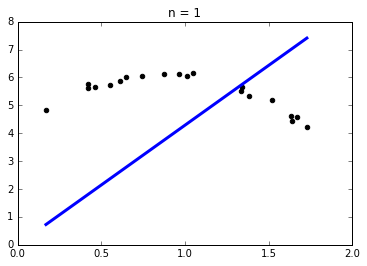

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     21.59
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           0.000176
Time:                        10:52:15   Log-Likelihood:                -54.918
No. Observations:                  20   AIC:                             111.8
Df Residuals:                      19   BIC:                             112.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.5164      0.542      4.647      0.0

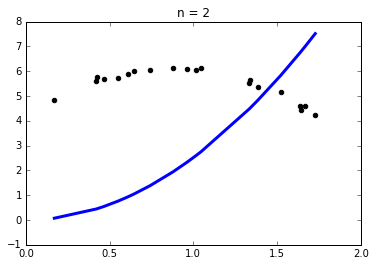

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     12.88
Date:                Wed, 12 Oct 2016   Prob (F-statistic):            0.00196
Time:                        10:52:16   Log-Likelihood:                -57.333
No. Observations:                  20   AIC:                             116.7
Df Residuals:                      19   BIC:                             117.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.4198      0.396      3.589      0.0

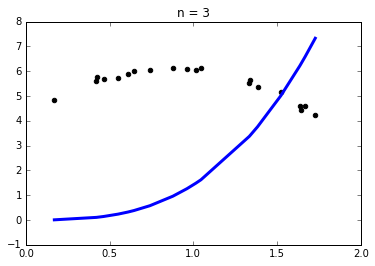

In [23]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 4):
    X = monomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    print(regr.summary())

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.99e-12
Time:                        11:03:51   Log-Likelihood:                -16.634
No. Observations:                  20   AIC:                             35.27
Df Residuals:                      19   BIC:                             36.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.7183      0.108     15.889      0.0

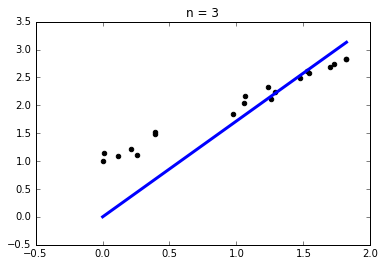

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     483.6
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           5.64e-15
Time:                        11:03:52   Log-Likelihood:                -20.974
No. Observations:                  20   AIC:                             43.95
Df Residuals:                      19   BIC:                             44.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.9353      0.133     21.991      0.0

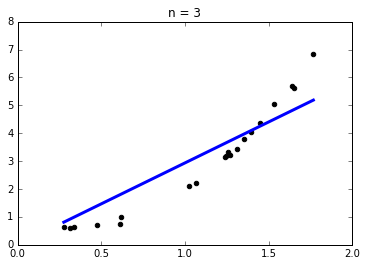

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     88.57
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.39e-08
Time:                        11:03:52   Log-Likelihood:                -46.629
No. Observations:                  20   AIC:                             95.26
Df Residuals:                      19   BIC:                             96.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             5.1619      0.548      9.411      0.0

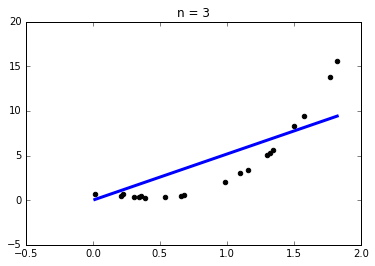

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     81.85
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           2.57e-08
Time:                        11:03:52   Log-Likelihood:                -73.123
No. Observations:                  20   AIC:                             148.2
Df Residuals:                      19   BIC:                             149.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            14.4181      1.594      9.047      0.0

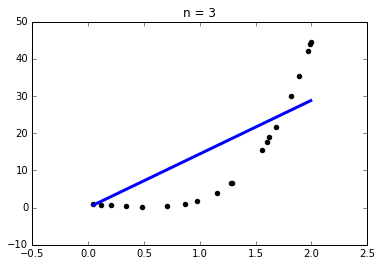

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.88
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           3.93e-06
Time:                        11:03:53   Log-Likelihood:                -86.300
No. Observations:                  20   AIC:                             174.6
Df Residuals:                      19   BIC:                             175.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            21.1673      3.311      6.394      0.0

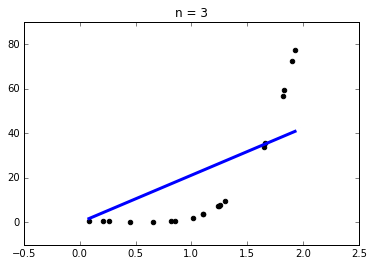

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     33.75
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.35e-05
Time:                        11:03:53   Log-Likelihood:                -76.689
No. Observations:                  20   AIC:                             155.4
Df Residuals:                      19   BIC:                             156.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            14.6931      2.529      5.810      0.0

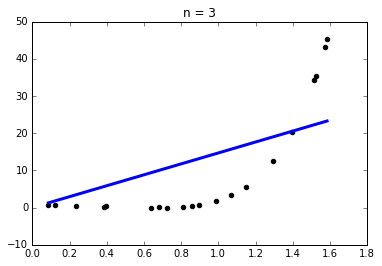

In [26]:
for degree in range(1, 7):
    # Generate some data
    f = lambda x: 1 - 2 * x + 3 * x ** degree + np.random.normal(mu, sigma)
    data = generate_data(f, 0, 2, n=20)

    domain = np.array([x[0] for x in data])
    Y = np.array([x[1] for x in data])

    X = np.array([domain]).transpose()
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()
    
    # Compute the errors
    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    # Plot outputs
    # The coefficients
    print(regr.summary())

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()